## Machine Learning: Linear Regression Model

Based on the tutorial available at: https://www.youtube.com/watch?v=R15LjD8aCzc&t=74s

### Load Dataset

In [1]:
from sklearn import datasets

In [2]:
diabetes = datasets.load_diabetes()

In [3]:
type(diabetes)

sklearn.utils.Bunch

In [4]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [5]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

#### Feature Names

In [6]:
print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


#### Create X and Y data matrices

In [7]:
X = diabetes.data
Y = diabetes.target

In [8]:
X.shape, Y.shape

((442, 10), (442,))

#### Load dataset + Create X and Y data matrices (in 1 step)

In [9]:
X, Y = datasets.load_diabetes(return_X_y=True)

In [10]:
X.shape, Y.shape

((442, 10), (442,))

### Data Split

In [11]:
# Import library
from sklearn.model_selection import train_test_split

#### Perform 80/20 Data split

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=.2)

In [13]:
X_train.shape, Y_train.shape

((353, 10), (353,))

In [14]:
X_test.shape, Y_test.shape

((89, 10), (89,))

### Linear Regression Model

In [15]:
#Import library
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

#### Build Linear Regression Model

In [16]:
# Defines the regression model
model = linear_model.LinearRegression()

In [17]:
model.fit(X_train, Y_train)

LinearRegression()

#### Apply trained model to make prediction (on test set)

In [18]:
Y_pred = model.predict(X_test)

### Prediction results

#### Print model performance

In [19]:
print('Coefficients: ', model.coef_)
print('Intercept: ', model.intercept_)
print('Mean squared error (MSE): %.2f' % mean_squared_error(Y_test, Y_pred))
print('Coefficient of determination (R^2): %.2f' % r2_score(Y_test, Y_pred))

Coefficients:  [   -6.02579853  -236.57384735   494.58479886   353.4817496
 -1177.68715168   834.84943541   241.25467977   147.04164729
   850.56710161   113.01279736]
Intercept:  153.6269717403176
Mean squared error (MSE): 2605.74
Coefficient of determination (R^2): 0.59


In [20]:
predictions = model.predict(X_test)

In [21]:
# Compare actual value with the predicted value
print(f"True value: {Y_test[0]}")
print(f"Predicted value: {predictions[0]}")
print(f"Error or Residuals value: {predictions[0]-Y_test[0]}")

True value: 248.0
Predicted value: 199.22553123685216
Error or Residuals value: -48.77446876314784


In [22]:
import pandas as pd

# Create a dataframe with each predicted y-value, actual y-value, error
pd.DataFrame({"Predicted": predictions, "Actual": Y_test, "Error": predictions - Y_test}).head()

,Predicted,Actual,Error
0,199.225531,248.0,-48.774469
1,165.874109,104.0,61.874109
2,64.240605,77.0,-12.759395
3,114.549647,72.0,42.549647
4,160.416141,85.0,75.416141


### Plots

In [23]:
# import libraries
import seaborn as sns

#### Scatterplot

/Users/gabrielpivaro/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

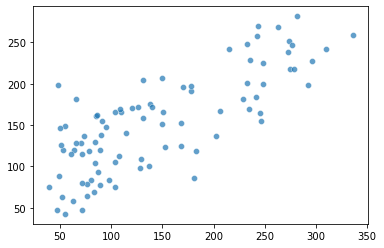

In [24]:
sns.scatterplot(Y_test, Y_pred,alpha=.7)

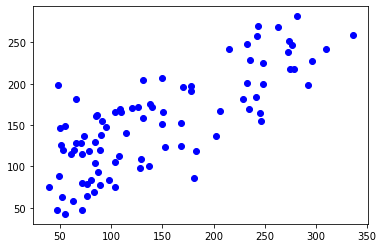

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(Y_test, predictions, c="blue")
# plt.plot(Y_test, predictions, c="red")